# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Read target csv
subset_name = 'target_subset_' + Path('.').resolve().name
df = pd.read_csv(f'../../../../data/interim/{subset_name}.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
1,6DHP_o,2.040,2018-11-21T00:00:00Z,>6dhp_o mol:protein length:244 Photosystem II...,QTLTYDDIVGTGLANKCPTLDDTARGAYPIDSSQTYRIARLCLQPT...,244,91,34,True
2,6UVQ_A,1.840,2020-11-25T00:00:00Z,>6uvq_A mol:protein length:268 D-glucose O-me...,MTDISQMYDQLSDPFAGLGAGNIHLGYFDGPDDAATLAEAADRLTD...,268,8,3,True
3,6BNZ_A,1.450,2018-11-21T00:00:00Z,>6bnz_A mol:protein length:296 Lactoylglutath...,GSHMASMATGSEASKAAEAVVDWHKHDSKRMLHAVYRVGDLDRTIK...,296,4,3,True
4,5OJL_A,1.560,2018-05-30T00:00:00Z,>5ojl_A mol:protein length:298 Imine reductase,MATTTTTTKLTIFGLGAMGTAMATQFLKQGHTPTVWNRTAAKANPL...,298,61,29,True
...,...,...,...,...,...,...,...,...,...
295,7CFU_J,2.150,2021-06-30T00:00:00Z,>7cfu_J mol:protein length:208 DNA/pantothena...,LVPRGSHMSERADGAQRALAQVRLLWGVCGSFSAVAVPHVNAWLRG...,208,25,25,False
296,7BGG_A,1.040,2021-09-22T00:00:00Z,>7bgg_A mol:protein length:245 heterocyclic t...,MGSSHHHHHHHHENLYFQSAGTESLDLEFESAYRGESVAFGEGVRP...,245,4,4,False
297,6W9S_A,2.100,2020-07-01T00:00:00Z,>6w9s_A mol:protein length:179 OTU domain-con...,SSPQSVFSDSVSSSRLELKKQIIKALDLDYWQGSGGEIMPLVLIDF...,179,1,1,False
298,5ZMP_A,2.190,2019-02-06T00:00:00Z,>5zmp_A mol:protein length:307 lysine deacylase,MIHLIYSDQFLDHGTGRSHPESARRLTAIAQALKAVSWANQIQWHE...,307,1,1,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

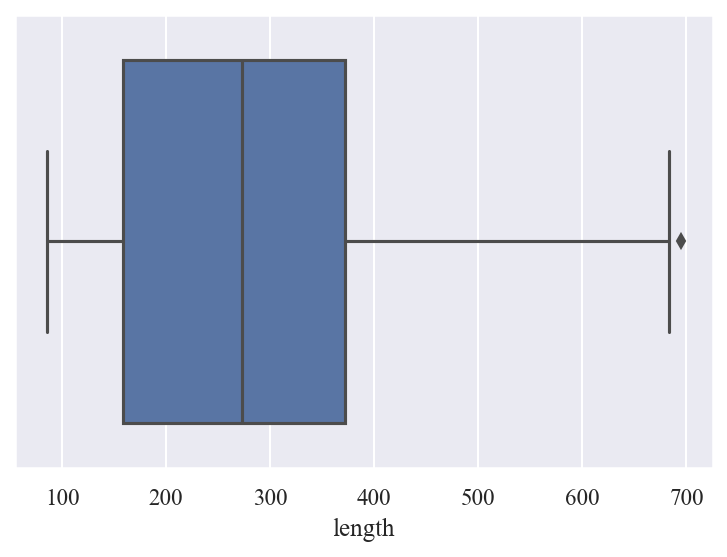

In [5]:
# Sequence length
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

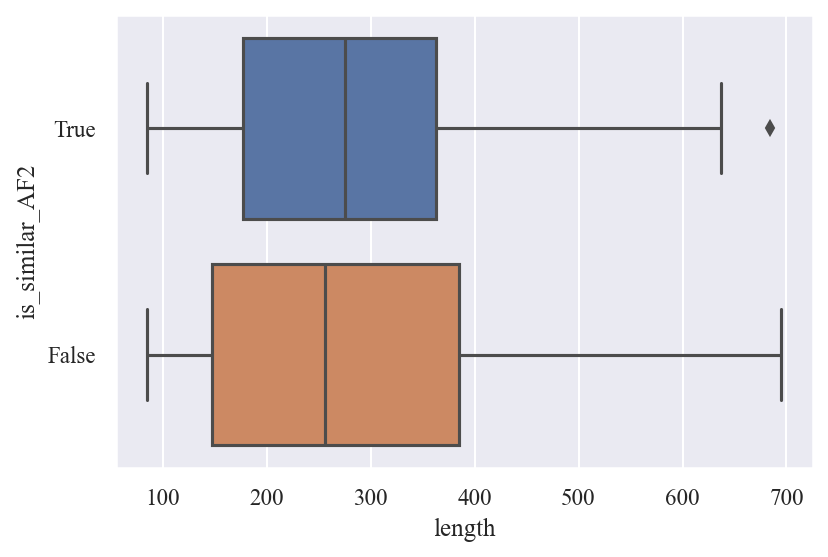

In [6]:
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

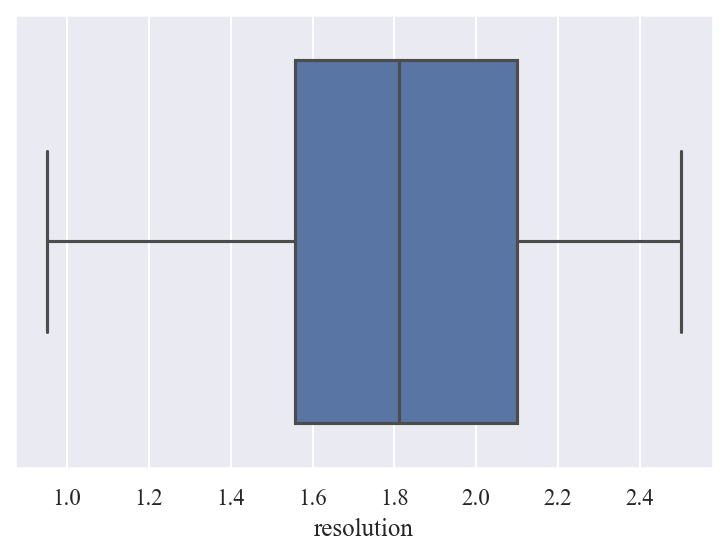

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

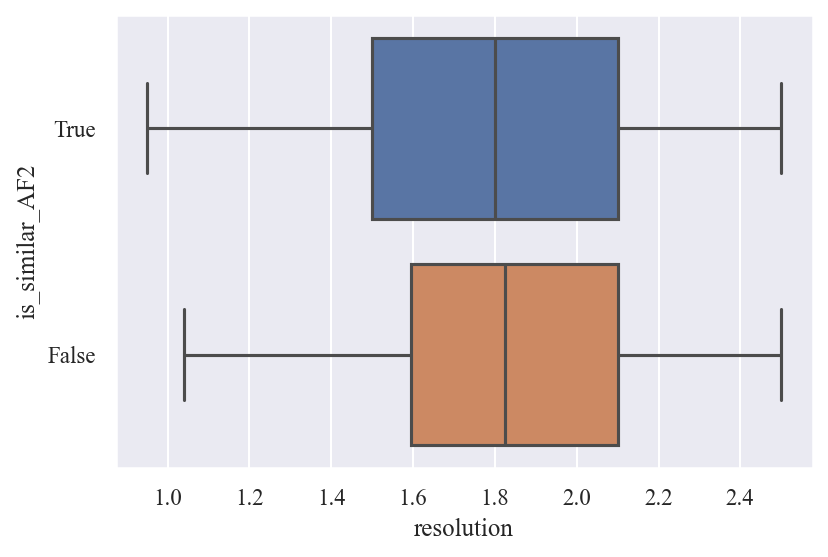

In [8]:
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

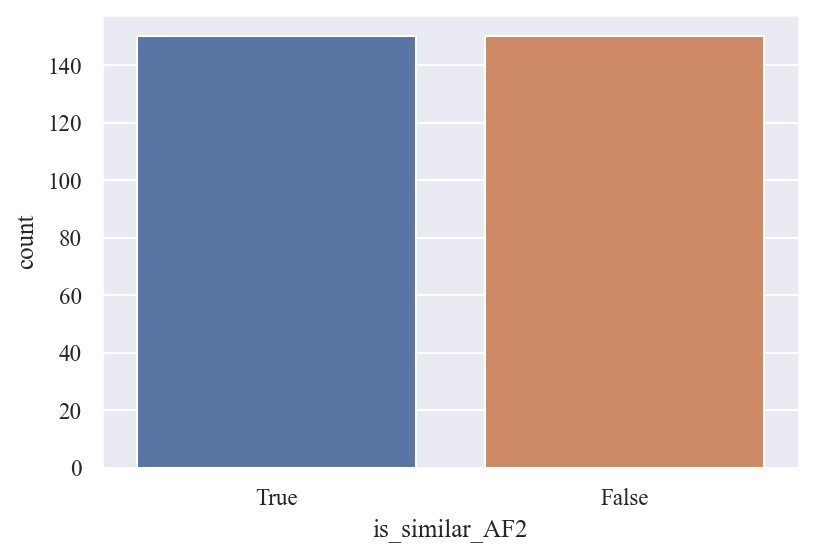

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
sns.countplot(data=df, x='is_similar_AF2')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

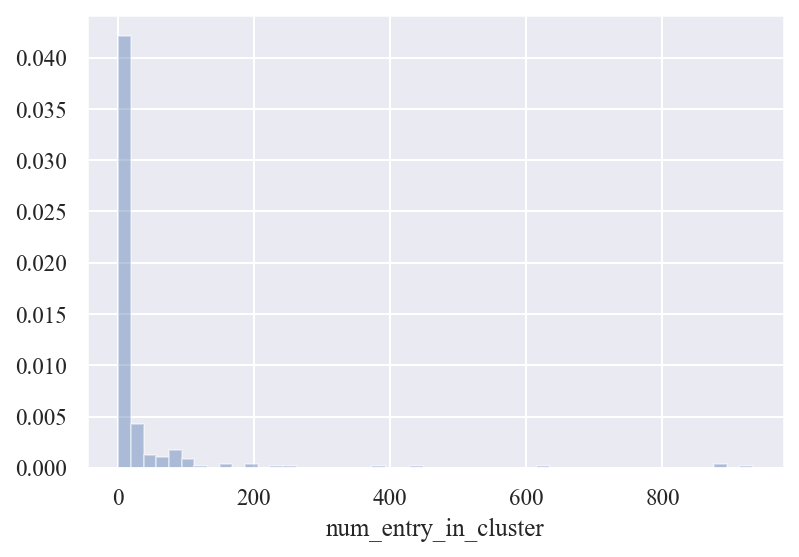

In [10]:
sns.distplot(df['num_entry_in_cluster'], kde=False, norm_hist=True)

<AxesSubplot:xlabel='num_sequence_in_cluster_included_AF2'>

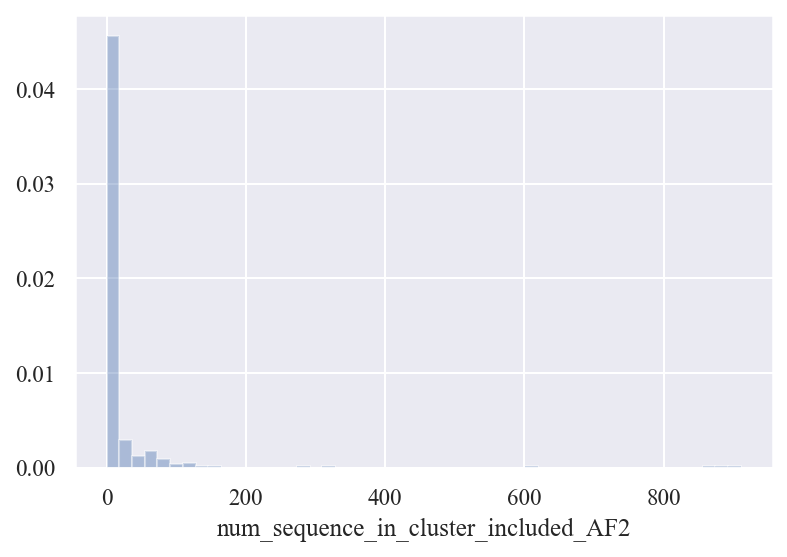

In [11]:
sns.distplot(df['num_sequence_in_cluster_included_AF2'], kde=False, norm_hist=True)